## Practical Work 2

In [1]:
def plot(learning_rate):
    plt.plot(cost,'-o')
    plt.title('The Cost vs Epochs')
    plt.xlim(-5,len(cost)+10)
    plt.xlabel('epochs')
    plt.ylabel('Cost')
    plt.grid()

    plt.figure()
    plt.plot(theta0_vec,cost[:len(theta0_vec)],'-o')
    plt.title(f'Learning Rate ={learning_rate}')
    plt.xlabel('Theta0')
    plt.ylabel('Cost')
    plt.grid()

    plt.figure()
    plt.plot(theta1_vec,cost[:len(theta1_vec)],'-o')
    plt.title(f'Learning Rate ={learning_rate}')
    plt.xlabel('Theta1')
    plt.ylabel('Cost')
    plt.grid()

    plt.figure()
    plt.scatter(X,y);
    plt.plot(X,y_predict,color='r');
    plt.title('Best Regression Line')
    plt.grid()

    plt.figure()
    plt.scatter(X,y)
    for i in predictions:
        plt.plot(X,i,color='r')    
    plt.title('All Regression Line')
    plt.show()

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline 

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
X.shape

(50,)

In [5]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

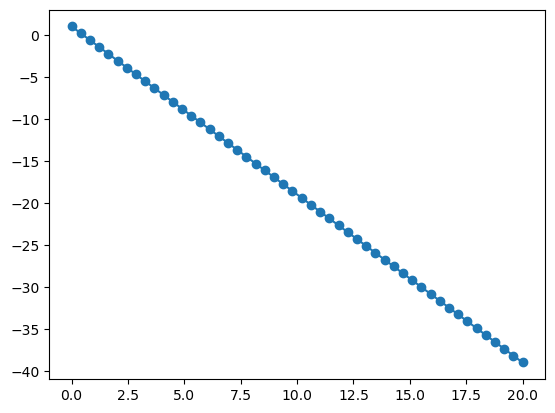

In [6]:
plt.plot(X,y,'-o')

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [7]:
def predict(X,theta):
    X = np.c_[np.ones(len(X)),X]
    predict = X@theta
    return predict

def update(learning_rate,d_theta,theta):
    theta = theta - (learning_rate)*(d_theta)
    return theta

def calc_error(h_theta,y,m):
    error = (h_theta-y)
    j = (error.T@error/(2*m))[0,0]
    return j, error

def calc_grad(X,error,m):
    d_theta = (X.T@error)/m
    grad_norm = np.linalg.norm(d_theta,2)
    return d_theta,grad_norm
    
def LinearReg(X,y,learning_rate=0.001,epochs=1000,verbose=1):
    X = np.c_[np.ones(X.shape[0]),X]
    y = y.reshape(-1,1)
    m = X.shape[0]
    theta = np.zeros((X.shape[1],1))
    cost = []
    theta0_vec = []
    theta1_vec = []
    predictios = []
    for i in range(epochs):
        h_theta = X@theta
        predictios.append(h_theta)

        j,error = calc_error(h_theta,y,m)
        cost.append(j)
        
        d_theta, grad_norm = calc_grad(X,error,m)
        
        if i>1 and ((cost[i-1] - cost[i]) or grad_norm)<0.001:
            print('\n***************** Training Report ***************')
            print(f'After {i} epochs')
            print('The optimum Thetas: ',theta.reshape(-1))
            print('The Cost function: ', j.reshape(-1))
            print('With Gradient Norm:',grad_norm)
            break
    
        theta0_vec.append(theta[0][0])
        theta1_vec.append(theta[1][0])
        theta = update(learning_rate,d_theta,theta)

        
        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta.reshape(-1))
            print('Error Vec:\n',error.reshape(-1))
            print('\nCost = ',j.reshape(-1))
            print('Norm Gradient',grad_norm)
            print('thetas : ',theta.reshape(-1))

    return theta,cost, theta0_vec, theta1_vec, predictios

In [8]:
# def LinearReg(X,y,learning_rate=0.001,max_itration=1000,verbose=1):
#     theta_0 , theta_1 = 0, 0
#     cost = []
#     for i in range(max_itration):
#         h_theta = theta_0+theta_1*X

#         error = (h_theta-y)
#         j = np.linalg.norm(error)**2/(2*m)
#         cost.append(j)            

#         d_theta_0 = error.sum()/m
#         d_theta_1 = (error*X).sum()/m
#         grad_vec = np.array([[d_theta_0],[d_theta_1]])
#         grad_norm = np.linalg.norm(grad_vec,2)
        
#         if(grad_norm)<0.03:
#             print('this is the last iteration ',i,' with the theta_0 : ',theta_0,' and theta_1 : ',theta_1)
#             break
#         if len(cost) > 1:
#             if cost[i] >= cost[i-1]:
#                 print('this is the last iteration ',i,' with the theta_0 : ',theta_0,' and theta_1 : ',theta_1)
#                 break
    

#         theta_0 = theta_0 - (learning_rate*d_theta_0)
#         theta_1 = theta_1 - (learning_rate*d_theta_1)
        
#         if i in range(0,10000,verbose):
#             print('\n************************** itration ',i,'*************************\n')
#             print('h(x)\n',h_theta)
#             print('Error Vec:\n',error)
#             print('\nCost = ',j)
#             print('Norm Gradient',grad_norm)
#             print('theta_0 : ',theta_0)
#             print('theta_1 : ',theta_1)

#     return theta_0,theta_1,J

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [9]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearReg(X,y,learning_rate=0.0005,epochs=300,verbose=50)


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Cost =  [249.8877551]
Norm Gradient 260.08269357432516
thetas :  [-0.0095     -0.12969388]

************************** itration  50 *******************

#### Calculate r2 score

h(x) = y_predict:
 [ -0.13068861  -0.90887618  -1.68706376  -2.46525133  -3.24343891
  -4.02162649  -4.79981406  -5.57800164  -6.35618921  -7.13437679
  -7.91256437  -8.69075194  -9.46893952 -10.24712709 -11.02531467
 -11.80350225 -12.58168982 -13.3598774  -14.13806497 -14.91625255
 -15.69444013 -16.4726277  -17.25081528 -18.02900286 -18.80719043
 -19.58537801 -20.36356558 -21.14175316 -21.91994074 -22.69812831
 -23.47631589 -24.25450346 -25.03269104 -25.81087862 -26.58906619
 -27.36725377 -28.14544134 -28.92362892 -29.7018165  -30.48000407
 -31.25819165 -32.03637922 -32.8145668  -33.59275438 -34.37094195
 -35.14912953 -35.92731711 -36.70550468 -37.48369226 -38.26187983] 
y_actual:
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.

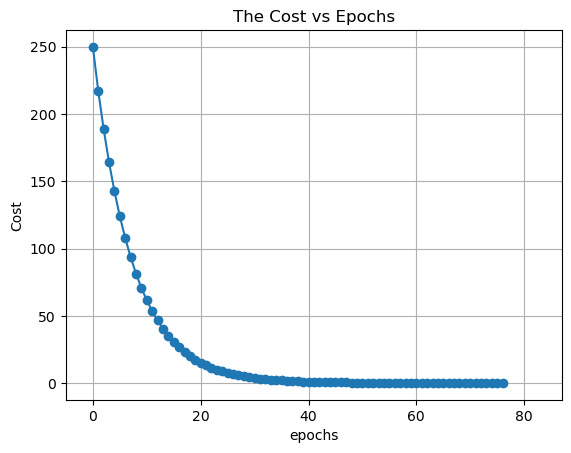

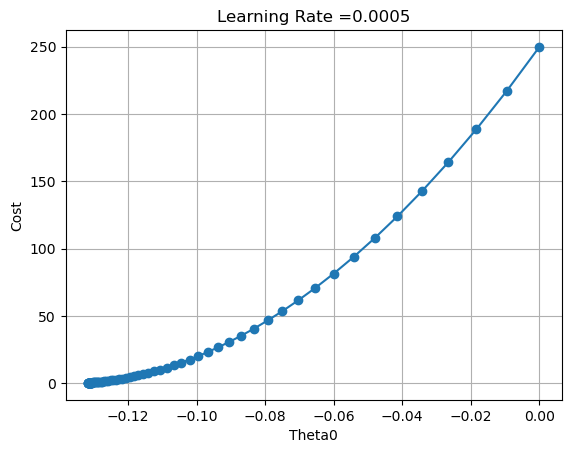

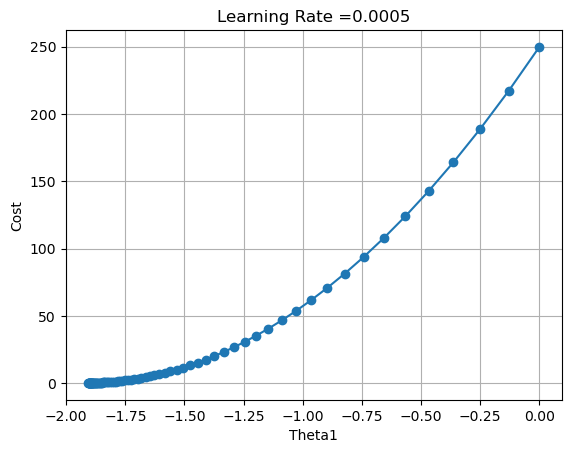

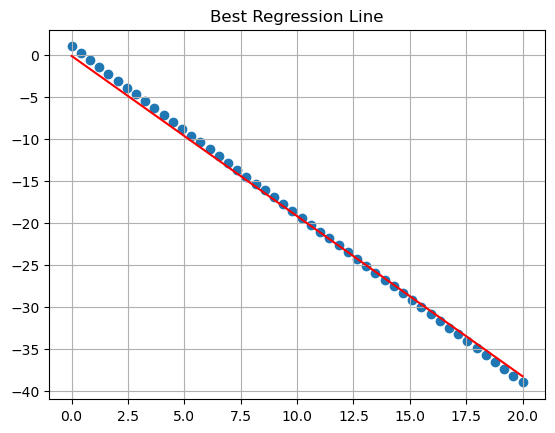

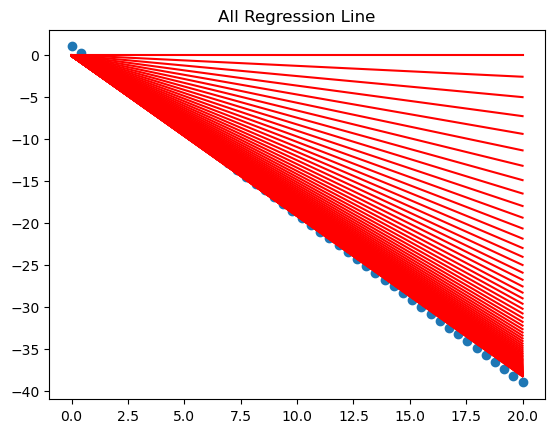

In [10]:
y_predict = predict(X,th)
print('h(x) = y_predict:\n',y_predict.reshape(-1),'\ny_actual:\n',y.reshape(-1))
print('\nThe R-square value : ',r2_score(y,y_predict))
plot(0.0005)

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

#### Plot all regression lines till converge

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Cost =  [249.8877551]
Norm Gradient 260.08269357432516
thetas :  [-0.00095    -0.01296939]

************************** itration  100 ******************

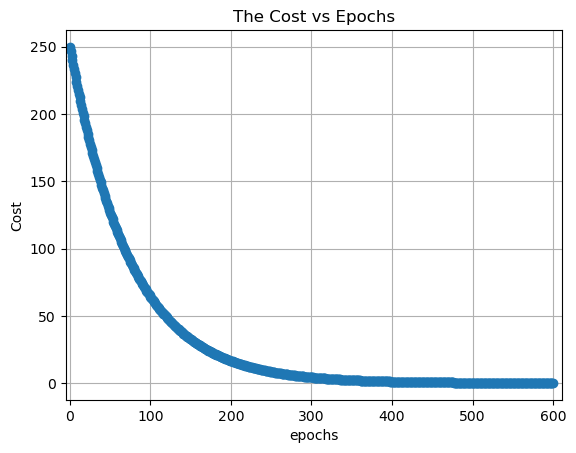

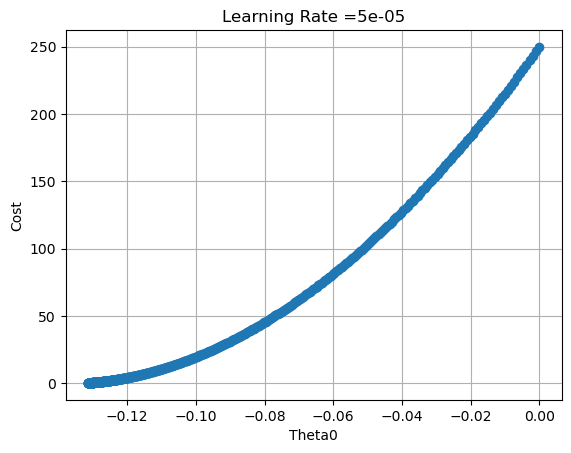

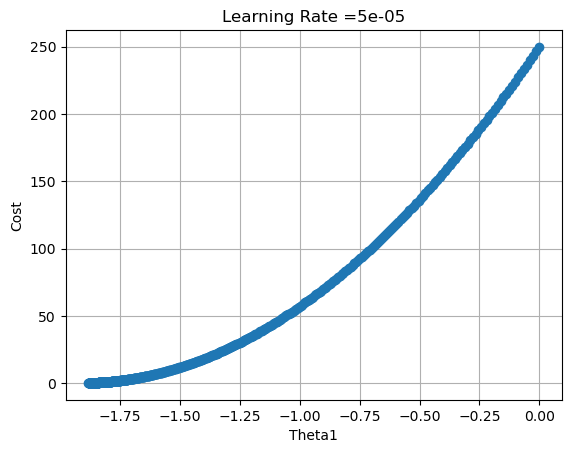

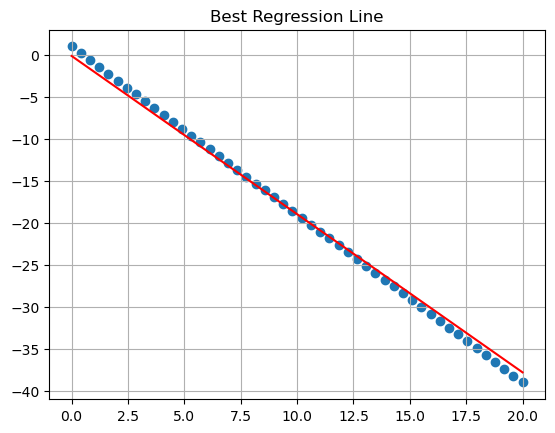

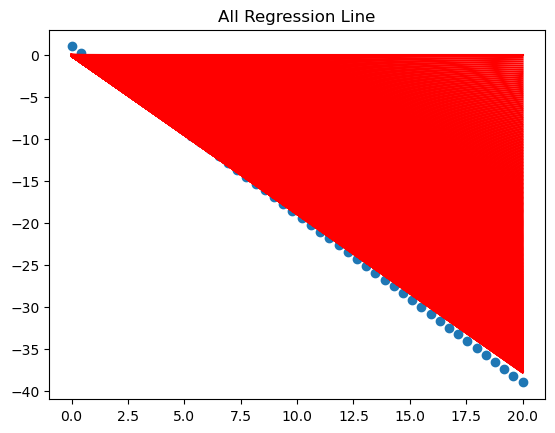

In [11]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearReg(X,y,learning_rate=0.00005,epochs=1000,verbose=100)

y_predict = predict(X,th)
print('h(x) = y_predict:\n',y_predict.reshape(-1),'\ny_actual:\n',y.reshape(-1))
print('\nThe R-square value : ',r2_score(y,y_predict))

plot(0.00005)

##### The following results uses alpha = 0.005 and max. iterations = 300.


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Cost =  [249.8877551]
Norm Gradient 260.08269357432516
thetas :  [-0.095      -1.29693878]

***************** Training Report ***************
After 7 e

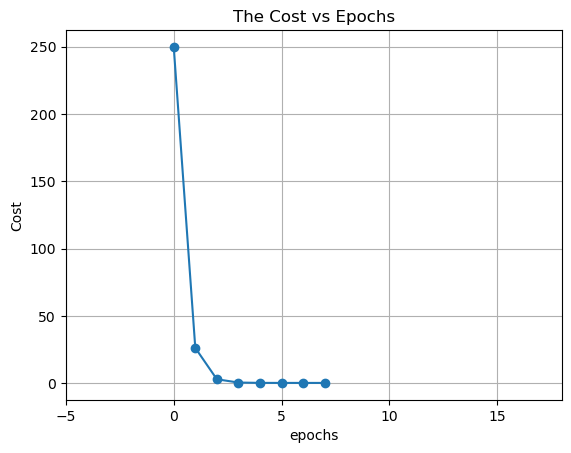

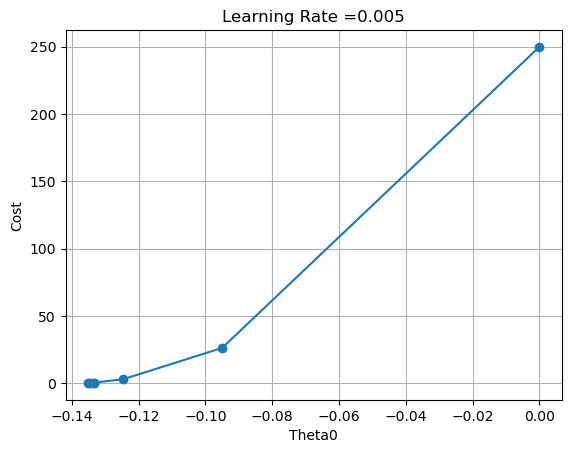

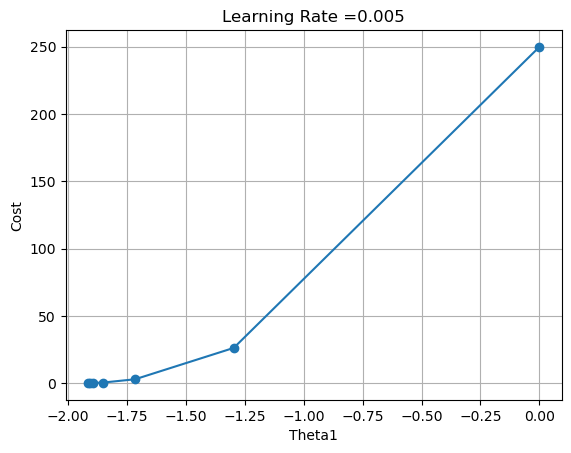

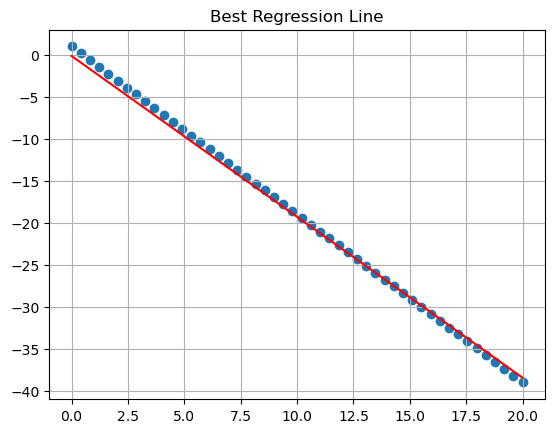

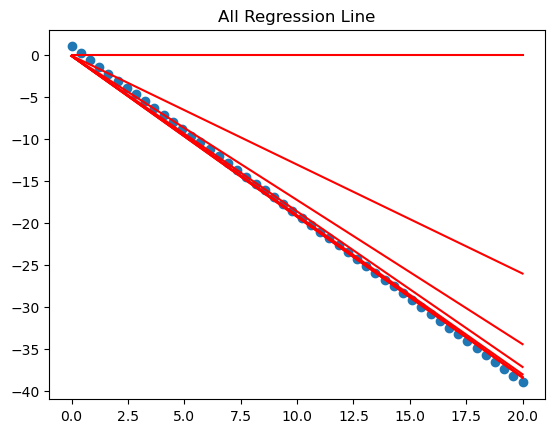

In [12]:
th, cost ,theta0_vec, theta1_vec, predictions = LinearReg(X,y,learning_rate=0.005,epochs=300,verbose=100)

y_predict = predict(X,th)
print('h(x) = y_predict:\n',y_predict.reshape(-1),'\ny_actual:\n',y.reshape(-1))
print('\nThe R-square value : ',r2_score(y,y_predict))

plot(0.005)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [20]:
def linearRegSGD(X,y,learning_rate=0.001,epochs=300):
    # reshape the x and y 
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    # concatenating the x and y value to shuffle them together
    df = np.concatenate((X,y),axis=1)
    # initialize the values of thetas and alpha(learning_rate)
    theta_0,theta_1 = 0,0
    # Creating the list to save the values of each iteration
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    pred_list = []
    m = len(X)
    for epoch in range(epochs):
        np.random.shuffle(df)
        X = df[:,0]
        y = df[:,1]
        for i in range(len(X)):
            # calculating the h(x) = y_predict
            h_theta = theta_0 + theta_1*X[i]
            pred_list.append(h_theta)
            # calculating the error h(x)-y_actual
            error = h_theta-y[i]
            # calculating the loss function for every observation
            j = (error**2)/2
            cost_list.append(j)
            # calculatin the gradent and its norm for each observation
            grad_0 = error
            grad_1 = error*X[i]
            grad_vec = np.array([grad_0,grad_1])
            grad_norm = np.linalg.norm(grad_vec,2)

            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)

            # this if condition is to break when the value of the cost function in the last of each epoch more than the one in the first of the epoch
            # which means that the cost function is increase due to overfitting
            # chech if the grad_norm is approximate to the zero value
            if (epoch >0 and np.abs(cost_list[(epoch-1)*m]-cost_list[epoch*m])<0.01) or (np.abs(grad_norm)<0.01):
                print('This is the last Epoch,', epoch,'with Theta_0 : ',theta_0,' Theta_1',theta_1)
                break

            # updating the thetas
            theta_0 = theta_0 - learning_rate*(grad_0)
            theta_1 = theta_1 - learning_rate*(grad_1)

        # this if condition is to break when the value of the cost function in the last of each epoch more than the one in the first of the epoch
        # which means that the cost function is increase due to overfitting
        # chech if the grad_norm is approximate to the zero value
        if (epoch >0 and np.abs(cost_list[(epoch-1)*m]-cost_list[epoch*m])<0.01) or (np.abs(grad_norm)<0.01):
            break

        # this if condition to print the values every specific intervals
        if epoch in range(0,1000,5):
            print('***************** Epoch, ',epoch,'***********************')
            print('h(x) : ',h_theta)
            print('Error : ',error)
            print('Cost : ',j)
            print('Grad_norm : ',grad_norm)
            print('theta_0 : ',theta_0,'\ntheta_1 : ',theta_1,'\n')
    return cost_list, theta_0_list, theta_1_list, pred_list

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [21]:
cost_list, theta_0_list, theta_1_list, pred_list = linearRegSGD(X,y,learning_rate=0.0005,epochs=300)
y_predict = theta_0_list[-1] + theta_1_list[-1]*X
print('\nR-score : ', r2_score(y,y_predict))

***************** Epoch,  0 ***********************
h(x) :  -19.154201103668154
Error :  0.25396216163796836
Cost :  0.032248389771914784
Grad_norm :  2.60386503910535
theta_0 :  -0.13097282936384147 
theta_1 :  -1.8655845403422222 

This is the last Epoch, 3 with Theta_0 :  -0.11975107155099016  Theta_1 -1.9154787547668835

R-score :  0.9976709219497795


In [ ]:
plt.plot(theta_0_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(theta_1_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.xlim(0,100)

plt.figure()
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.grid()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [22]:
cost_list, theta_0_list, theta_1_list, pred_list = linearRegSGD(X,y,learning_rate=0.0001,epochs=300)
y_predict = theta_0_list[-1] + theta_1_list[-1]*X
print('R-score : ', r2_score(y,y_predict))

***************** Epoch,  0 ***********************
h(x) :  -17.581700088677433
Error :  19.78564685009808
Cost :  195.73591063839802
Grad_norm :  380.07672843977673
theta_0 :  -0.06978525053166612 
theta_1 :  -0.9509144119815753 

This is the last Epoch, 2 with Theta_0 :  -0.11670652732773791  Theta_1 -1.610250232546758
R-score :  0.9063021369257382


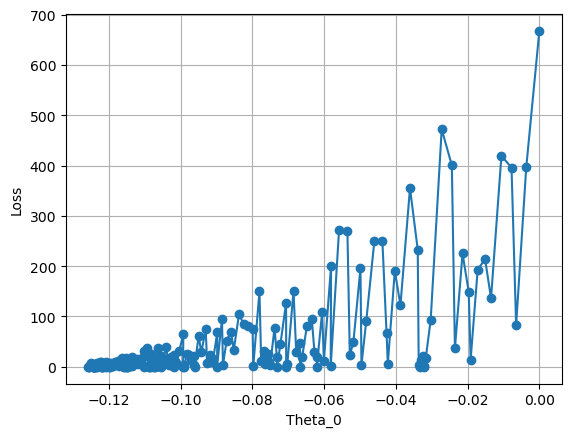

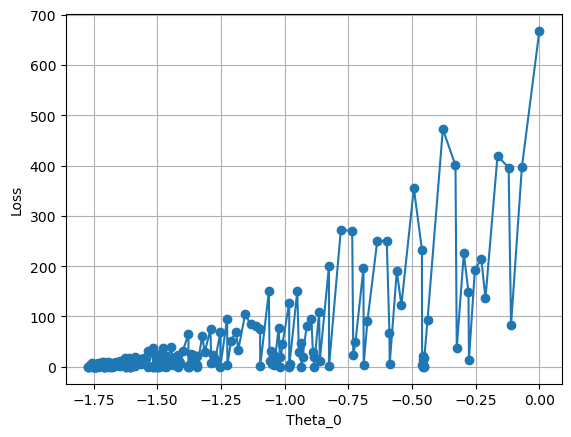

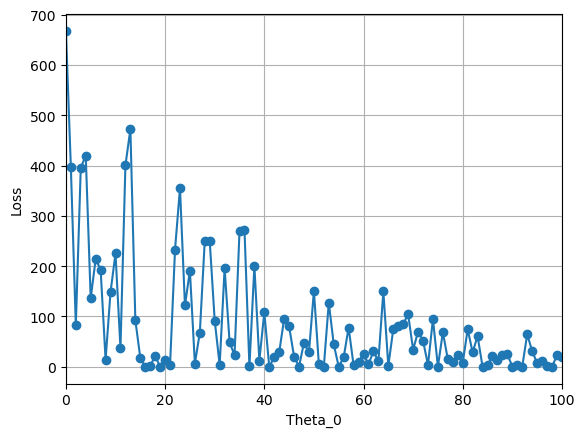

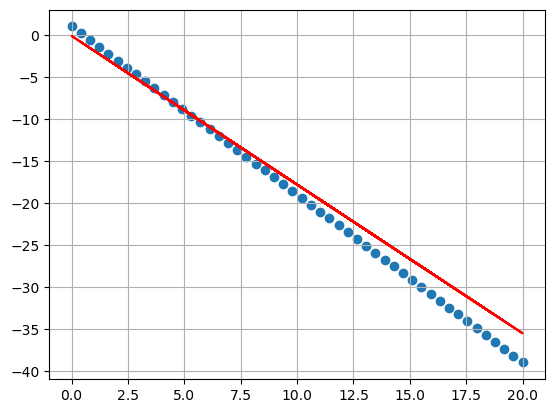

In [256]:
plt.plot(theta_0_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(theta_1_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.xlim(0,100)

plt.figure()
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.grid()

##### The following results uses alpha = 0.00007 and max. iterations = 300.

***************** Epoch,  0 ***********************
h(x) :  -8.249948610067056
Error :  13.607194247075801
Cost :  92.57786763882639
Grad_norm :  156.10497101509657
theta_0 :  -0.05346449410079839 
theta_1 :  -0.7281614596094717 

***************** Epoch,  5 ***********************
h(x) :  -2.3401790795041517
Error :  -0.891199487667417
Cost :  0.39711826340933326
Grad_norm :  1.408934038897382
theta_0 :  -0.1281342924546477 
theta_1 :  -1.8063759073255354 

***************** Epoch,  10 ***********************
h(x) :  -20.360865396548242
Error :  -0.13637560062987575
Cost :  0.009299152223579684
Grad_norm :  1.4536624603825097
theta_0 :  -0.13042080441975407 
theta_1 :  -1.9062281486532413 

This is the last Epoch, 11 with Theta_0 :  -0.1301018917887875  Theta_1 -1.9077025971437986
R-score :  0.9975611509396589


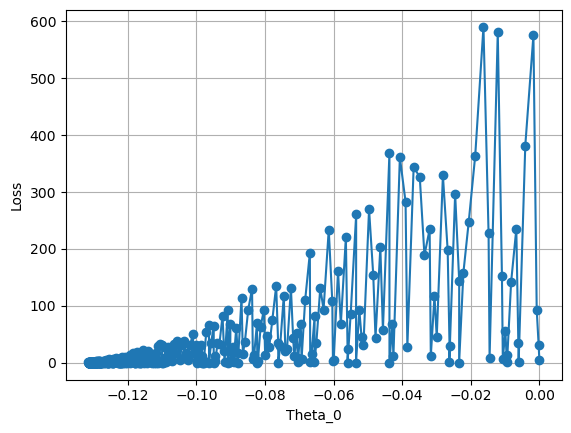

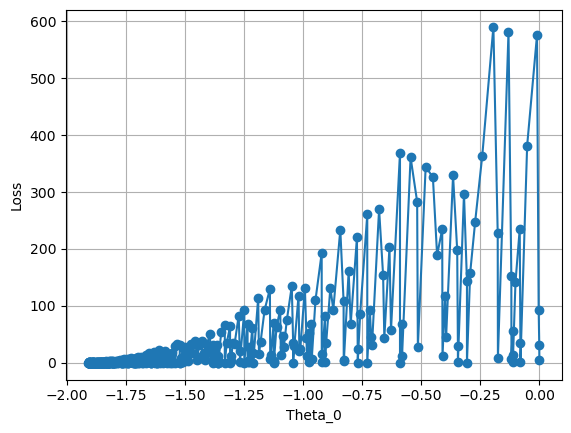

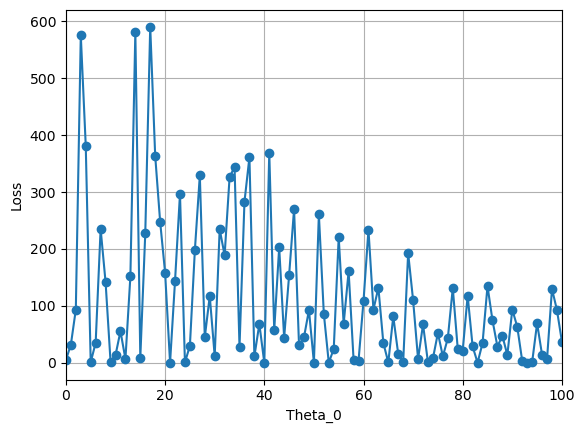

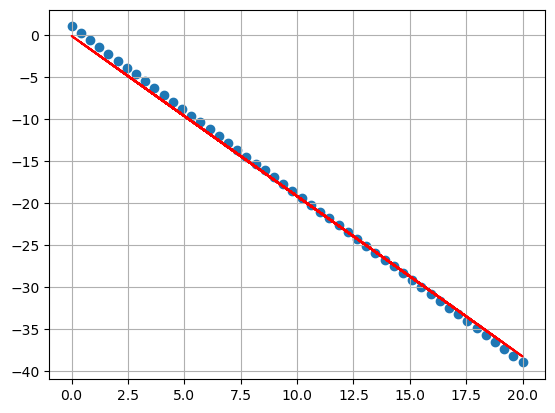

In [257]:
cost_list, theta_0_list, theta_1_list, pred_list = linearRegSGD(X,y,learning_rate=0.00007,epochs=300)
y_predict = theta_0_list[-1] + theta_1_list[-1]*X
print('R-score : ', r2_score(y,y_predict))

plt.plot(theta_0_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(theta_1_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.xlim(0,100)

plt.figure()
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.grid()

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [33]:
def linearRegMini(X,y,learning_rate=0.001,epochs=300,verbose=1,batch_size=1):
    # reshape the x and y 
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    # concatenating the x and y value to shuffle them together
    df = np.concatenate((X,y),axis=1)
    # initialize the values of thetas and alpha(learning_rate)
    theta_0,theta_1 = 0,0
    # Creating the list to save the values of each iteration
    cost = []
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    pred_list = []
    m = int(len(X)/batch_size)
    batch_amount = int((len(X)/batch_size))

    for epoch in range(epochs):
        np.random.shuffle(df)
        X = df[:,0]
        y = df[:,1]
        for i in range(batch_size):
            X_batch = X[i*batch_amount:i*batch_amount+batch_amount]
            y_batch = y[i*batch_amount:i*batch_amount+batch_amount]

            h_theta = theta_0+theta_1*X_batch
            pred_list.append(h_theta)
            
            error = (h_theta-y_batch)
            j = np.linalg.norm(error)**2/(2*m) 
            cost.append(j)
            cost_list.append(j)

            grad_0 = error.sum()/m
            grad_1 = (error*X_batch).sum()/m
            grad_vec = np.array([grad_0,grad_1])
            grad_norm = np.linalg.norm(grad_vec,2)
            
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            
            theta_0 = theta_0 - (0.001*grad_0)
            theta_1 = theta_1 - (0.001*grad_1)

        # this if condition is to break when the value of the cost function in the last of each epoch more than the one in the first of the epoch
        # which means that the cost function is increase due to overfitting
        # chech if the grad_norm is approximate to the zero value
        if (epoch >0 and np.abs(cost[(epoch-1)*batch_size]-cost[epoch*batch_size])<0.01) or (np.abs(grad_norm)<0.01):
            print('This is the last Epoch,', epoch,'with Theta_0 : ',theta_0,' Theta_1',theta_1)
            break
        if epoch in range(0,10000,verbose):
            print('\n************************** Epoch ',epoch,'*************************\n')
            print('h(x)\n',h_theta)
            print('Error Vec:\n',error)
            print('\nCost = ',j)
            print('grad_0 : ',grad_0)
            print('grad_1 : ',grad_1)
            print('Norm Gradient',np.linalg.norm(grad_vec,2))
            print('theta_0 : ',theta_0)
            print('theta_1 : ',theta_1)

    return cost_list, theta_0_list, theta_1_list, pred_list

In [31]:
def linearRegMini(X,y,learning_rate=0.001,epochs=300,verbose=1,batch_size=1):
    # reshape the x and y 
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    # concatenating the x and y value to shuffle them together
    df = np.concatenate((X,y),axis=1)
    # initialize the values of thetas and alpha(learning_rate)
    theta_0,theta_1 = 0,0
    # Creating the list to save the values of each iteration
    cost = []
    cost_list = []
    theta_0_list = []
    theta_1_list = []
    pred_list = []
    m = int(len(X)/batch_size)

    for epoch in range(epochs):
        np.random.shuffle(df)
        X = df[:,0]
        y = df[:,1]
        for i in range(batch_size):
            X_batch = X[i*m:i*m+m]
            y_batch = y[i*m:i*m+m]

            h_theta = theta_0+theta_1*X_batch
            pred_list.append(h_theta)
            
            error = (h_theta-y_batch)
            j = np.linalg.norm(error)**2/(2*m) 
            cost.append(j)
            cost_list.append(j)

            grad_0 = error.sum()/m
            grad_1 = (error*X_batch).sum()/m
            grad_vec = np.array([grad_0,grad_1])
            grad_norm = np.linalg.norm(grad_vec,2)
            
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            
            theta_0 = theta_0 - (learning_rate*grad_0)
            theta_1 = theta_1 - (learning_rate*grad_1)

        # this if condition is to break when the value of the cost function in the last of each epoch more than the one in the first of the epoch
        # which means that the cost function is increase due to overfitting
        # chech if the grad_norm is approximate to the zero value
        if (epoch >0 and np.abs(cost[(epoch-1)*batch_size]-cost[epoch*batch_size])<0.01) or (np.abs(grad_norm)<0.01):
            print('This is the last Epoch,', epoch,'with Theta_0 : ',theta_0,' Theta_1',theta_1)
            break
        if epoch in range(0,10000,verbose):
            print('\n************************** Epoch ',epoch,'*************************\n')
            print('h(x)\n',h_theta)
            print('Error Vec:\n',error)
            print('\nCost = ',j)
            print('grad_0 : ',grad_0)
            print('grad_1 : ',grad_1)
            print('Norm Gradient',np.linalg.norm(grad_vec,2))
            print('theta_0 : ',theta_0)
            print('theta_1 : ',theta_1)

    return cost_list, theta_0_list, theta_1_list, pred_list

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.


************************** Epoch  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vec:
 [20.2244898   8.79591837 31.65306122  7.97959184 22.67346939 30.83673469
 16.95918367 16.14285714  0.63265306 12.87755102 39.          1.44897959
 11.24489796  3.08163265 38.18367347 21.04081633 19.40816327 24.30612245
 28.3877551   7.16326531 26.75510204 18.59183673  6.34693878 17.7755102
  3.89795918 32.46938776 12.06122449 29.20408163 10.42857143 30.02040816
 25.12244898 33.28571429  4.71428571 -0.18367347  9.6122449  34.10204082
 23.48979592 25.93877551 35.73469388 15.32653061 37.36734694 27.57142857
 34.91836735 14.51020408 13.69387755 21.85714286  5.53061224 36.55102041
  2.26530612 -1.        ]

Cost =  249.88775510204087
grad_0 :  19.000000000000004
grad_1 :  259.38775510204084
Norm Gradient 260.08269357432516
theta_0 :  -0.009500000000000001
the

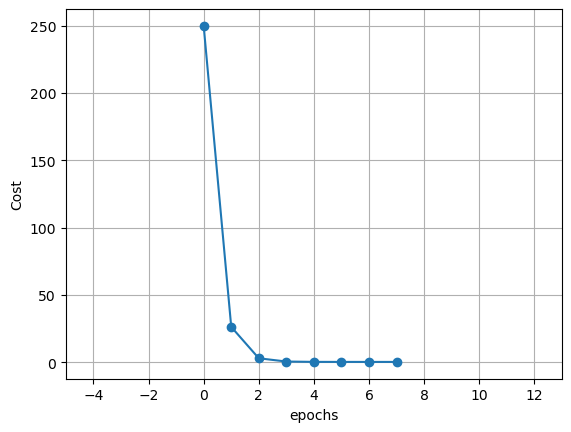

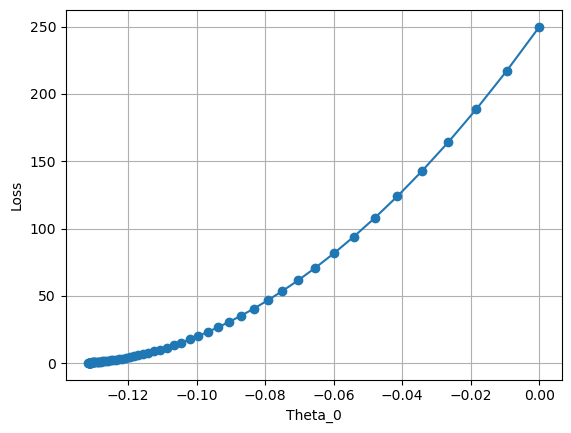

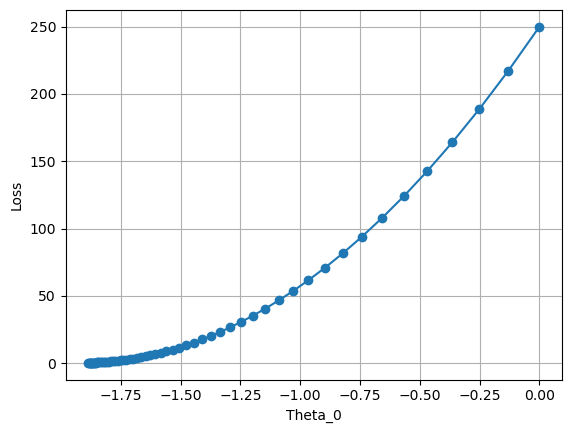

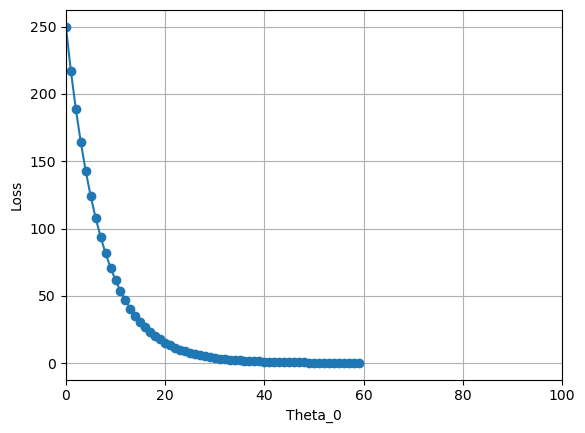

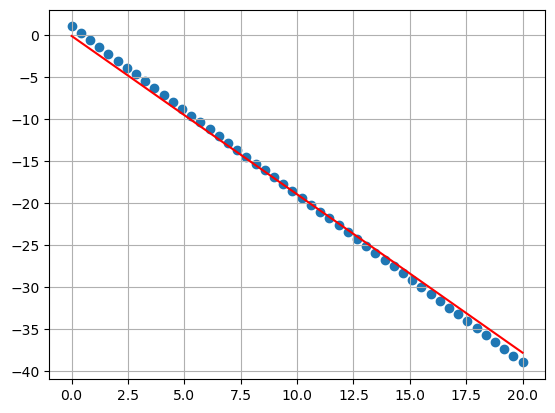

In [34]:
cost_list, theta_0_list, theta_1_list, pred_list = linearRegMini(X,y,learning_rate=0.0005,epochs=300,batch_size=1,verbose=100)
y_predict = theta_0_list[-1] + theta_1_list[-1]*X
print('R-score : ', r2_score(y,y_predict))

plt.plot(cost,'-o')
plt.xlim(-5,len(cost)+5)
plt.xlabel('epochs')
plt.ylabel('Cost')
plt.grid()
plt.figure()
plt.plot(theta_0_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(theta_1_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.xlim(0,100)

plt.figure()
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.grid()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.


************************** Epoch  0 *************************

h(x)
 [ -7.68429092  -8.26761799 -24.01744898  -4.76765555 -15.26754287]
Error Vec:
 [1.92795398 2.16095344 8.45193878 0.76295669 4.95694692]

Cost =  10.497542112060206
grad_0 :  3.6521499624037275
grad_1 :  43.822899044221856
Norm Gradient 43.97481870329821
theta_0 :  -0.1046911118090533
theta_1 :  -1.4729742292200343

************************** Epoch  2 *************************

h(x)
 [-15.53620135 -35.565255   -28.63212105 -25.55072818 -30.17281748]
Error Vec:
 [-0.20967074  0.98576541  0.57196059  0.38804733  0.66391721]

Cost =  0.193420096240438
grad_0 :  0.48000395870307566
grad_1 :  8.245932139889828
Norm Gradient 8.25989108015588
theta_0 :  -0.12971701261082408
theta_1 :  -1.895599064425026

************************** Epoch  4 *************************

h(x)
 [ -7.92475805 -35.22256201 -32.10281299  -0.12538549 -29.76300122]
Error Vec:
 [-0.76149274  0.51213186  0.36657477 -1.12538549  0.25740694]

Cost =  0.230

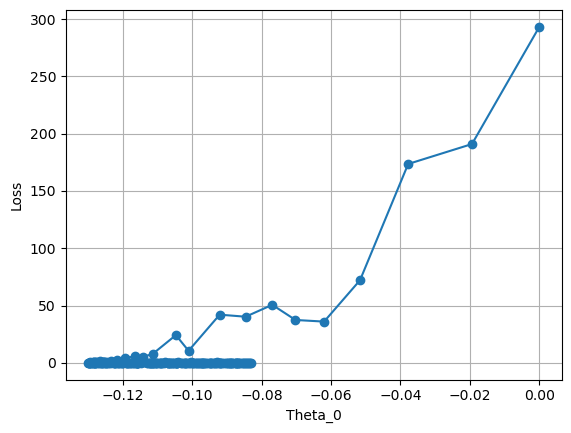

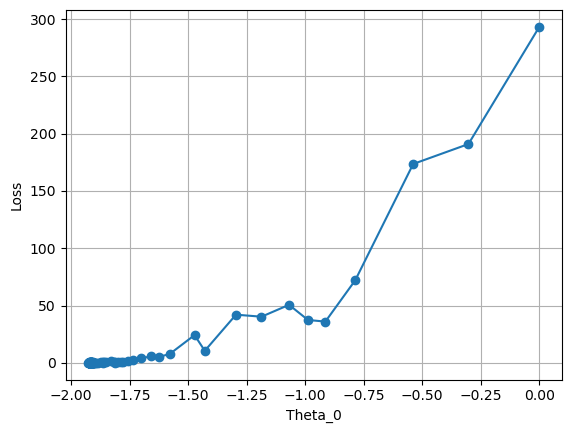

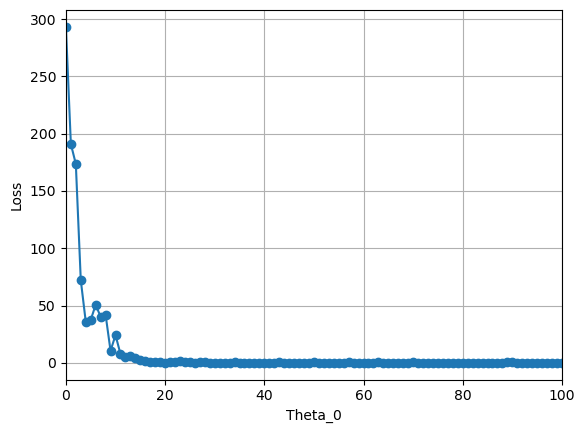

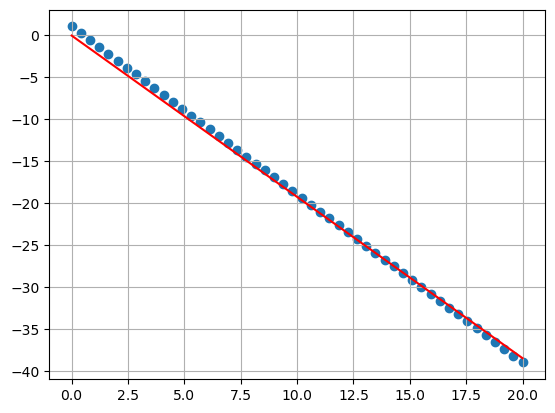

In [35]:
cost_list, theta_0_list, theta_1_list, pred_list = linearRegMini(X,y,learning_rate=0.0005,epochs=300,batch_size=10,verbose=2)
y_predict = theta_0_list[-1] + theta_1_list[-1]*X
print('R-score : ', r2_score(y,y_predict))

plt.plot(theta_0_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(theta_1_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.xlim(0,100)

plt.figure()
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.grid()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.


************************** Epoch  0 *************************

h(x)
 [ -1.61720676 -13.4891687 ]
Error Vec:
 [-0.9845537   0.20470885]

Cost =  0.25281292364785696
grad_0 :  -0.3899224218547658
grad_1 :  0.35013305097014474
Norm Gradient 0.5240540510736921
theta_0 :  -0.1328215921554911
theta_1 :  -1.818244305333938

************************** Epoch  5 *************************

h(x)
 [ -3.23031472 -32.09939277]
Error Vec:
 [-0.9650086   0.36999498]

Cost =  0.267034471839139
grad_0 :  -0.29750680801110363
grad_1 :  2.30811427725002
Norm Gradient 2.3272090189018986
theta_0 :  -0.10903580548075097
theta_1 :  -1.9139092282559051

************************** Epoch  10 *************************

h(x)
 [-24.28473783 -30.53020571]
Error Vec:
 [0.02138462 0.30652898]

Cost =  0.023604329939914508
grad_0 :  0.16395680313264194
grad_1 :  2.575010951311925
Norm Gradient 2.5802254228399932
theta_0 :  -0.08371373101494425
theta_1 :  -1.9152495505372003

************************** Epoch  15 *******

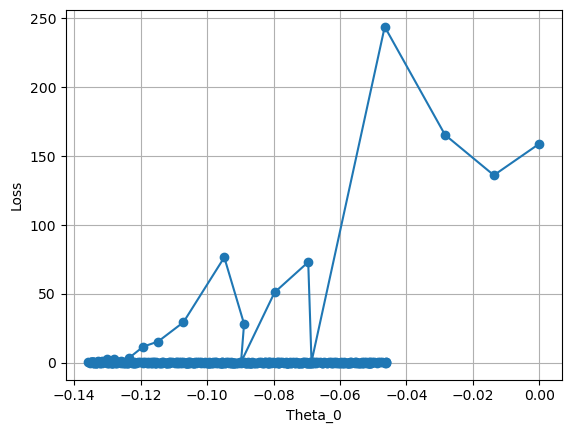

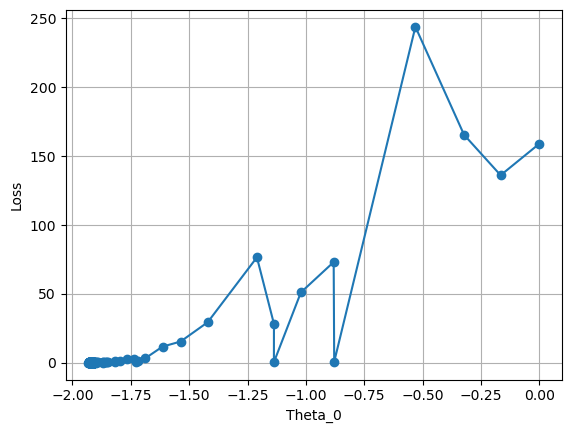

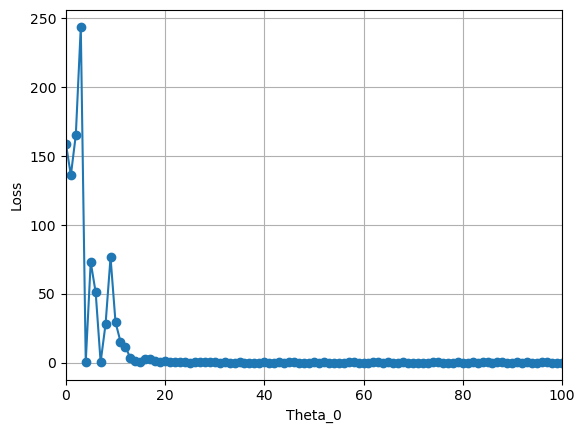

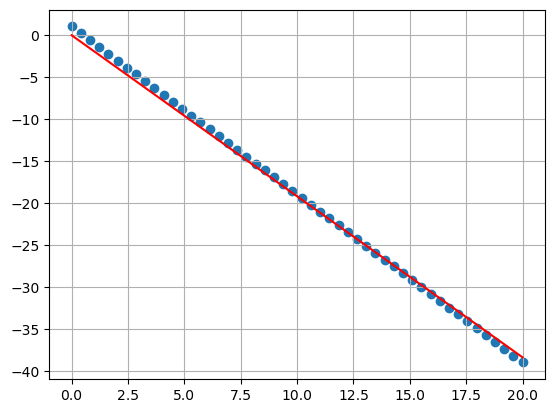

In [36]:
cost_list, theta_0_list, theta_1_list, pred_list = linearRegMini(X,y,learning_rate=0.0005,epochs=300,batch_size=20,verbose=5)
y_predict = theta_0_list[-1] + theta_1_list[-1]*X
print('R-score : ', r2_score(y,y_predict))

plt.plot(theta_0_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(theta_1_list,cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')

plt.figure()
plt.plot(cost_list,'-o')
plt.grid()
plt.xlabel('Theta_0')
plt.ylabel('Loss')
plt.xlim(0,100)

plt.figure()
plt.scatter(X,y)
plt.plot(X,y_predict,color='r')
plt.grid()